In [1]:
# CS2170 Final Project
# lenz Baron Balita and Cara L. Roño


In [2]:
!pip install pyLDAvis==2.1.2
!pip install nltk
!pip install sklearn
!pip install gensim
!pip install seaborn
!pip install plotly
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import random


#topic modeling
import nltk
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.util import ngrams
import nltk, re, string, gensim
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import defaultdict
from gensim import corpora
from nltk.stem import SnowballStemmer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\slash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\slash\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\slash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\slash\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## **I. Data Gathering**

the dataset that will be used in this study is sourced from Kaggle. The dataset is about Netflix movies and TV shows. It contains more than 7000 rows of different movies and TV shows and listing each of their description, genres, title, directors, and much more. 

In importing the dataset there are two path specified either by colab or jupyter. 


In [3]:
#If will be opened in jupyter remove this
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#path for Jupyter
df=pd.read_csv(r"..\CS170-BALITA-RONO-FINALPROJECT\netflix_titles.csv")

#path for colab
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS170 Project/netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# The data set contains the following columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#With 7787 rows and 12 columns
df.shape

(7787, 12)

#**II. Data Cleaning**

In here we will first look into the type of fields of each column and to know what we're working on. The data set has quite a few columns thus we will delete some columns that will not be used in the study. We will also change some names of some columns to make them suitable for their contents. 

The data set will be split into Movies and Shows because it will used seperately to see differences of results between movies and shows. There will also be checking of duplicate rows and null values and if there are any will be deleted or filled. Some numeric field will also be standardized to check some outliers in the data. 

In [7]:
# checking data types of fields
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
# Dropping irrelevant columns that will not be used. 
df = df.drop(['show_id', 'cast', ], axis=1)
df.head(2)

,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,NaN,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [9]:
# renaming some column names. 
df = df.rename(columns={"listed_in":"genre"})
df.columns

Index(['type', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [10]:
# splitting the dataset between Movies and TV shows
netflix_movies = df[df['type'] == 'Movie']
netflix_shows = df[df['type'] == 'TV Show']

In [11]:
#checking duplicate rows. There are no duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [12]:
#checking null columns
print(df.isnull().sum())

type               0
title              0
director        2389
country          507
date_added        10
release_year       0
rating             7
duration           0
genre              0
description        0
dtype: int64


In [13]:
#replacing null values with 'not specified' or none

df.fillna('Not specified')
df.replace(np.nan, ' none')

,type,title,director,country,date_added,release_year,rating,duration,genre,description
0,TV Show,3%,none,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,Movie,Zulu Man in Japan,none,none,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,TV Show,Zumbo's Just Desserts,none,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [14]:
#standardizing numeric field 'release_year'
from scipy import stats
df['release_year_z']= stats.zscore(df['release_year'])
df['release_year_z']

0       0.692878
1       0.236092
2      -0.334890
3      -0.563284
4      -0.677480
          ...   
7782   -1.020070
7783    0.121896
7784    0.578682
7785    0.578682
7786    0.578682
Name: release_year_z, Length: 7787, dtype: float64

In [15]:
# detecting outliers z-values wither greater than 3 or less than -3. There are no outliers. 
outliers = df.query('release_year_z>3 | release_year<-3')
outliers

,type,title,director,country,date_added,release_year,rating,duration,genre,description,release_year_z


# **III. Exploratory Data Analysis**

General Question: **What are the common topics in Netflix based on their descriptions**

    - What are the common topics per genre and type(Movies/TV shows)?
    - what are the top keywords used in Movies and TV shows ? 
    - Are there similarities with the Movie/Show's genre and its description? 


Text(0.5, 1.0, 'Distribution of Movie/TV Show')

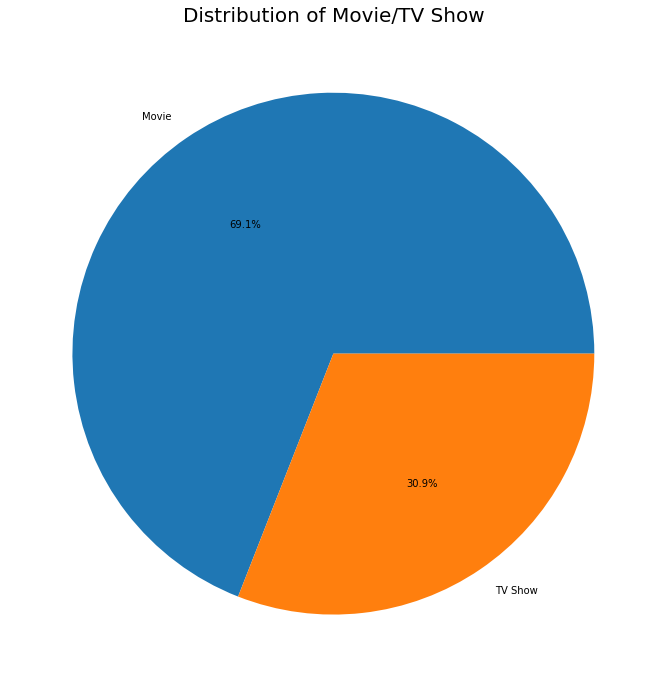

In [16]:
# Distribution of Movies/Shows
bar, ax = plt.subplots(figsize = (12,12))
plt.pie(df['type'].value_counts(), labels = df['type'].value_counts().index, autopct="%.1f%%")
plt.title('Distribution of Movie/TV Show', size=20)

Text(0.5, 1.0, 'Release Frequency over Years')

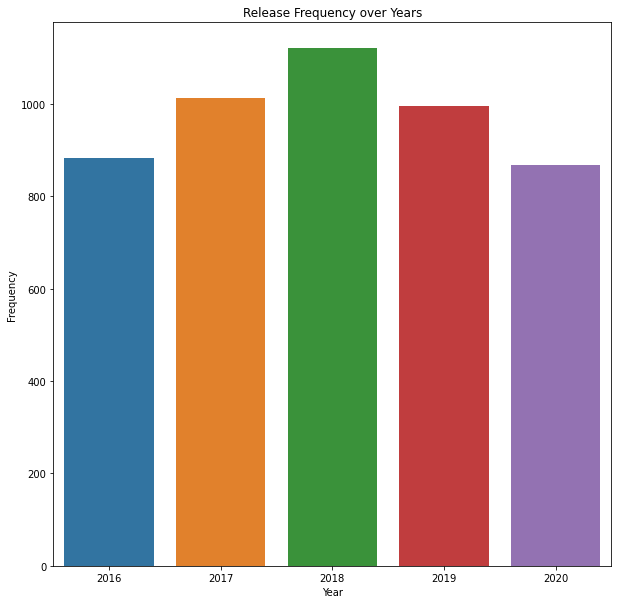

In [17]:
#changes size of figure
bar, ax = plt.subplots(figsize = (10,10))
#plotting a barplot using seaborn. with the x value ot release year and y value of total produced
sns.barplot(x = df['release_year'].value_counts().index[:5], y = df['release_year'].value_counts()[:5])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Release Frequency over Years')

The bar plot above indicates that the year of the mose production of movies and TV shows in netflix was in 2018

In [18]:
#Growth of Movie/Show over the years
movie_data = df[df['type'] == 'Movie']
tv_show_data = df[df['type'] == 'TV Show']
temp = df[['type', 'release_year']]
temp = temp.value_counts().to_frame()
temp.reset_index(level=[0,1], inplace=True)
temp = temp.rename(columns = {0:'count'})
temp = pd.concat([temp[temp['type'] == 'Movie'][:5], temp[temp['type']== 'TV Show'][:5]])

Text(0.5, 1.0, 'Growth of Movie/TV Show over Years')

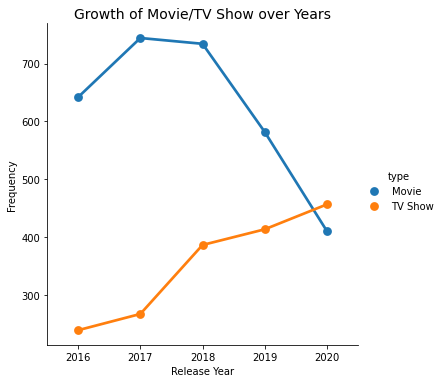

In [19]:
sns.catplot(x = 'release_year', y = 'count', hue = 'type', data = temp, kind = 'point')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Growth of Movie/TV Show over Years', size=14)

In the plot above it can be seen how there is a decrease of production of Movies from 2018 onwards and increase in the production of TV shows. 

<AxesSubplot:title={'center':'Top 10 countries that produced most movies'}>

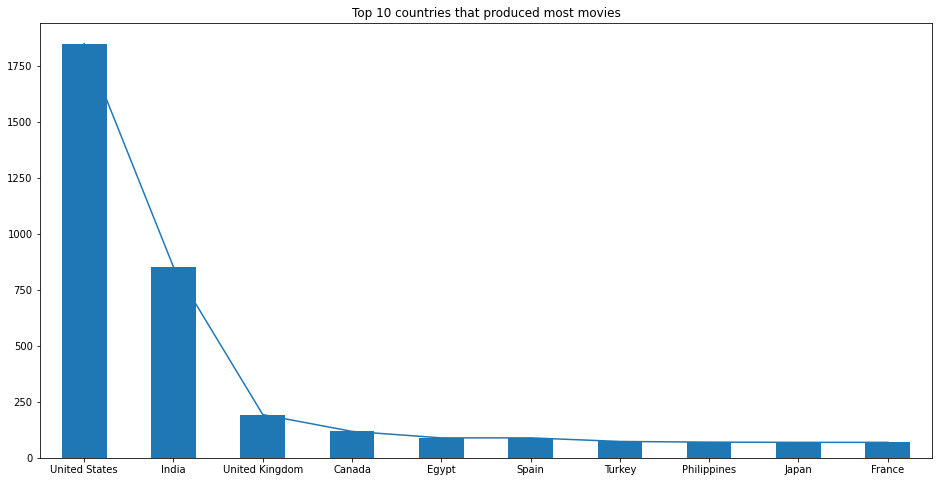

In [20]:
#Top 10 countries that produced most movies in Netflix

histo1= netflix_movies.country.value_counts().head(10)
#barplot
histo1.plot(kind='bar')
plt.title('Top 10 countries that produced most movies')
histo1.plot(figsize=(16,8))


In the barplot above it can be seen that the US followed by Indi tops the most movies produced in Netflix. Philippines is in the 8th place which is cool. 

<AxesSubplot:title={'center':'Top 10 countries that produced most TV shows'}>

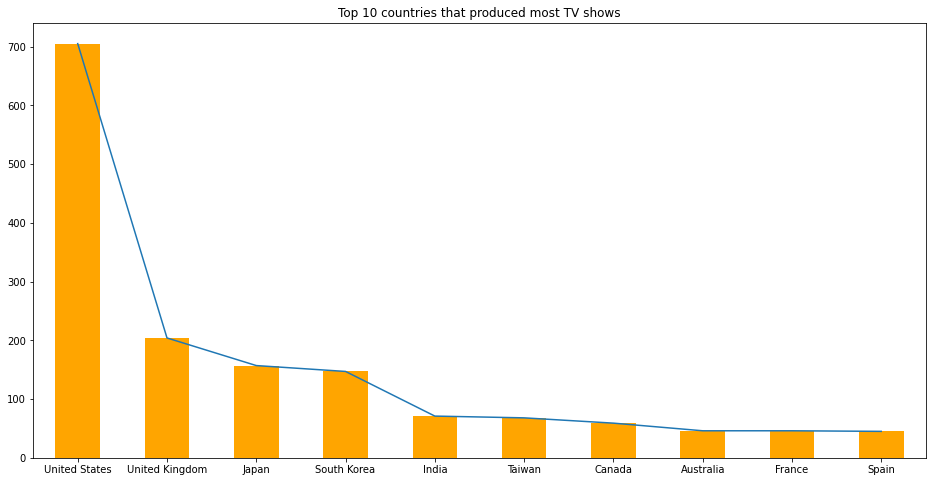

In [21]:
#Top 10 countries that produced most TV shows in Netflix

histo2=netflix_shows.country.value_counts().head(10)
histo2.plot(kind='bar', color='orange')
plt.title('Top 10 countries that produced most TV shows')
histo2.plot(figsize=(16,8))

as seen in this chart United states tops the production of TV shows followed by UK and Japan

<AxesSubplot:>

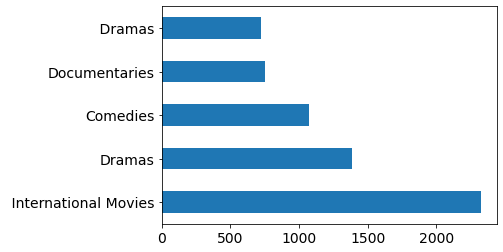

In [22]:
# top genres in Netflix

#filling null values 
df['genre']=df['genre'].fillna('Not Specified')
#Splitting multiple genres. 
FGenre=pd.DataFrame()
FGenre=df['genre'].str.split(',', expand=True).stack()
FGenre=FGenre.to_frame()
FGenre.columns=['Genre']
#grouping different genres and getting total content
genres=FGenre.groupby(['Genre']).size().reset_index(name='Total Content')
genres=genres[genres.Genre !='Not Specified']
genres=genres.sort_values(by=['Total Content'],ascending=False)
genres=genres.head()
#plotting bar chart
genres=FGenre.Genre.value_counts().head(5)
genres.plot(kind="barh", fontsize=14)

## Recommendations
Recommends movie based on description and grabs the similarity as its results

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

class ContentAnalysis():
    def __init__(self, data_frame, threshold = 0.1, stop_words = 'english', lowercase = True, use_idf = True, norm=u'l2', smooth_idf = True):
        self.data_frame = data_frame
        self.model = TfidfVectorizer(max_df=threshold,stop_words=stop_words, lowercase=lowercase, use_idf=use_idf,norm=norm,smooth_idf=smooth_idf)
        self.vector = False

    def generate_vector(self, data):
        self.vector = self.model.fit_transform(data)
    

    def find_movies(self, request, top = 10):
        if self.vector is not False:
            content_transformation = self.model.transform([request])
            movie_relatively = np.array(np.dot(content_transformation,np.transpose(self.vector)).toarray()[0])
            index = np.argsort(movie_relatively)[-top:][::-1]
            rate = [movie_relatively[i] for i in index]
            result = zip(index, rate)     
            self.render_result(request, result)
            

    def recommend_movie(self, request_index , top = 15):
        if self.vector is not False:
            cosine_similarity = linear_kernel(self.vector[request_index:request_index+1], self.vector).flatten()
            index = cosine_similarity.argsort()[-top-1:-1][::-1]
            rate = [cosine_similarity[i] for i in index]
            result = zip(index, rate)     
            self.render_result(str(self.data_frame[request_index:request_index+1]), result)

    def render_result(self, request_content,indices):
        print('Your request : ' + request_content)
        print('----------------------------------')
        print('Best Results :')
        data = self.data_frame
        for index, rate in indices:
            print('Confidence: {:.2f}%, {}'.format(rate*100, data['title'].loc[index] ))

In [24]:
vector = ContentAnalysis(df)
vector.generate_vector(df["title"])
vector.find_movies('Happy Birthday')

Your request : Happy Birthday
----------------------------------
Best Results :
Confidence: 62.52%, My Birthday Song
Confidence: 59.06%, Happy And
Confidence: 59.06%, Almost Happy
Confidence: 59.06%, Happy!
Confidence: 42.85%, My Happy Family
Confidence: 37.23%, Merry Happy Whatever
Confidence: 37.23%, Happy Go Lucky
Confidence: 37.23%, Happy Hunting
Confidence: 37.23%, Happy Times
Confidence: 36.64%, Happy Valley


In [25]:
#Recommends movie based on description and grabs the similarity as its results
vector = ContentAnalysis(df)
vector.generate_vector(df["description"])
vector.recommend_movie(100)

Your request :       type     title         director country      date_added  release_year  \
100  Movie  3 Idiots  Rajkumar Hirani   India  August 1, 2019          2009   

    rating duration                                   genre  \
100  PG-13  164 min  Comedies, Dramas, International Movies   

                                           description  release_year_z  
100  While attending one of India's premier college...       -0.563284  
----------------------------------
Best Results :
Confidence: 23.19%, College Romance
Confidence: 17.27%, Engineering Girls
Confidence: 15.25%, Candy Jar
Confidence: 15.13%, Mr. Young
Confidence: 14.78%, 100 Things to do Before High School
Confidence: 14.70%, Pahuna
Confidence: 14.66%, Best Neighbors
Confidence: 13.64%, Be with Me
Confidence: 13.47%, Moms at War
Confidence: 12.88%, Lovesong
Confidence: 12.67%, Limitless
Confidence: 12.65%, The Prince & Me
Confidence: 11.99%, Singles Villa
Confidence: 11.32%, Barrio Universitario
Confidence: 10.70%

# **IV. Modeling**

TOPIC MODELING - This creates topics/groups based on descriptions.

We used the Latent Dirichlet Allocation(LDA) that will look into the descriptions of each movies and hows in the dataset. 

training LDA model that is based on the title's descriptions and used to determine the topic of unseen description

Libraries used: gensim, nltk

In [26]:
ps = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer() 

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV


#Words from corpus - dictionary 
words = set(nltk.corpus.words.words())


#Text cleaning - tokenization, remove special characters, punctions, meaningless words etc.
def txt_clean(txt):
    tokens = nltk.word_tokenize(txt.lower())
    tokens_clean = [w for w in tokens if w.isalpha() and w in words] 
    return tokens_clean

#create unigram/bigram/trigram words, remove stopwords, lemmatize
def lemmatize_stem(tokens, ngram_type=None):
    
    bigram = gensim.models.Phrases(tokens, min_count=2, threshold=100)
    bigram_tokens = [bigram[tokens[w]] for w in range(len(tokens))]
    trigram = gensim.models.Phrases(bigram[tokens],threshold=100)
    trigram_tokens = [trigram[tokens[w]] for w in range(len(tokens))]
    
    tokens_clean = []
    if ngram_type == "bigram":
        tokens_c = bigram_tokens
    elif ngram_type == "trigram":
        tokens_c = trigram_tokens
    else:
        tokens_c = tokens

    for i in range(len(tokens)-1):
        txt = tokens_c[i]
        txt_above5 = [k for k in txt if len(k)>=5 and k not in gensim.parsing.preprocessing.STOPWORDS]
        lemma_txt = [lemmatizer.lemmatize(w,pos=tag_map[tg[0]]) for w,tg in nltk.pos_tag(txt_above5)]
        stem_txt = [w for w in lemma_txt]
        tokens_clean.append(stem_txt)

    dictionary = corpora.Dictionary(tokens_clean)
    corpus = [dictionary.doc2bow(text) for text in tokens_clean]
    
    return dictionary, corpus, tokens_clean
#splitting data sets for unseen data
unseen_len = int(round(0.10 * len(df),0))
unseen_data = df["description"].sample(unseen_len) #random sample
txt_data = df["description"].drop(unseen_data.index)

#Tokenize and clean
tokens = list(txt_data.apply(lambda x: txt_clean(x)))

#Chose bigram - it had the best performace (tried both unigram and trigram)
dictionary, corpus, tokens_clean = lemmatize_stem(tokens, "bigram")

from gensim.models import CoherenceModel

#(The number of topics and decay shouldn't be too high or too low)
topic_num = 40
min_probability = 0.05
learning_decay = 0.5


ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = topic_num, id2word=dictionary, passes=15, minimum_probability=min_probability, decay=learning_decay)

print("\nSample of Topics:")
for i,j in ldamodel.show_topics(formatted=True,num_words= 10):
    print("Topic-{} => {}".format(i,j))
topics = ldamodel.print_topics(num_words=10)




Sample of Topics:
Topic-10 => 0.085*"school" + 0.084*"student" + 0.058*"high_school" + 0.050*"business" + 0.046*"drama" + 0.044*"childhood" + 0.035*"share" + 0.027*"teacher" + 0.023*"footage" + 0.022*"college"
Topic-18 => 0.071*"discover" + 0.062*"relationship" + 0.057*"heart" + 0.036*"government" + 0.026*"rural" + 0.023*"course" + 0.023*"quirky" + 0.022*"reunite" + 0.020*"monster" + 0.020*"help"
Topic-1 => 0.073*"people" + 0.052*"bring" + 0.036*"reveal" + 0.036*"series" + 0.028*"break" + 0.026*"write" + 0.022*"transform" + 0.022*"collection" + 0.021*"colorful" + 0.021*"documentary"
Topic-32 => 0.082*"leave" + 0.079*"brother" + 0.050*"young" + 0.047*"adventure" + 0.043*"romantic" + 0.041*"family" + 0.037*"begin" + 0.029*"country" + 0.022*"woman" + 0.018*"torn_between"
Topic-3 => 0.109*"murder" + 0.046*"determine" + 0.043*"steal" + 0.031*"prove" + 0.030*"rescue" + 0.027*"corruption" + 0.026*"young" + 0.023*"politician" + 0.023*"lawyer" + 0.020*"kingdom"
Topic-31 => 0.082*"music" + 0.05

In [27]:
#Description-topic distributions for our training set  - It lists top 4 keywords and Dominant topic for each sentence
arr = []
for i, j in enumerate(ldamodel[corpus]):
    if len(j) > 0:
        max_val = sorted([w[1] for w in j],reverse=True)[0]
        max_topic = [w[0] for w in j if w[1]==max_val][0]
        keywords = ldamodel.show_topic(max_topic,topn=4)
        keywords = [k[0] for k in keywords]
        description = txt_data.iloc[i]
        arr.append([description,  ",".join(keywords), max_topic, round(max_val,2),])

lda_distribution = pd.DataFrame(arr, columns=['Description', 'Top Keywords', 'Dominant Topic', 'Probability'])
lda_distribution.head()

,Description,Top Keywords,Dominant Topic,Probability
0,In a future where the elite inhabit an island ...,"father,daughter,mother,mission",14,0.50
1,"When an army recruit is found dead, his fellow...","secret,writer,inside,brutal",39,0.27
2,"In a postapocalyptic world, rag-doll robots hi...","dangerous,navigate,battle,world",0,0.72
3,A brilliant group of students become card-coun...,"future,new_york,college,world",19,0.43
4,A genetics professor experiments with a treatm...,"sister,inspire,celebrity,female",36,0.70


In [28]:
#predicting topics for unseen data
unseen_clean = unseen_data.apply(lambda x: txt_clean(x))
    
arr = []
for i in unseen_clean:
    lemma_txt = [lemmatizer.lemmatize(w,pos=tag_map[tg[0]]) for w,tg in nltk.pos_tag(i)]
    lemma_txt2 = [w for w in lemma_txt if w not in gensim.parsing.preprocessing.STOPWORDS]
    arr2 = ldamodel[dictionary.doc2bow(lemma_txt2)]
    max_arr2 = sorted([x[1] for x in arr2],reverse=True)[:3]
    sel_arr2 = [list(x) for x in arr2 if x[1] in max_arr2][:3]
    sel_arr2 = sum(sel_arr2,[])
    if len(sel_arr2) != 6:
        sel_arr2.extend(["None"]*(6-len(sel_arr2)))
    
    sel_arr2.extend([i])
    arr.append(sel_arr2)

unseen_df = pd.DataFrame(arr, columns = ["topic_1", "topic_1_prob", "topic_2", "topic_2_prob", "topic_3", "topic_3_prob", 'Tokens']).round(2)
unseen_df["Description"] = list(unseen_data)
cols = list(unseen_df.columns)
cols = cols[-1:] + [cols[-2]] + cols[:-2]
unseen_df = unseen_df[cols]
unseen_df.head()

,Description,Tokens,topic_1,topic_1_prob,topic_2,topic_2_prob,topic_3,topic_3_prob
0,Comic Sam Kinison lets it rip with this perfor...,"[comic, sam, it, rip, with, this, performance,...",2,0.15,16,0.289287,26,0.146431
1,"While suitors swoon over her cousin, a single ...","[while, swoon, over, her, cousin, a, single, w...",8,0.18,14,0.215085,32,0.190691
2,While investigating a series of murders and th...,"[while, investigating, a, series, of, and, the...",11,0.15,20,0.14643,21,0.574901
3,"Eight stories celebrating family, faith, love ...","[eight, family, faith, love, and, forgiveness,...",14,0.21,20,0.104366,32,0.220633
4,"Lazy, lasagna-loving fat cat Garfield lives li...","[lazy, fat, cat, life, on, his, own, which, te...",2,0.26,4,0.256231,34,0.256285


clustering data set with the model results

In [29]:
#Clustering each movie/show per genre

#adding genre column in lds_distribution table
genres = pd.DataFrame(df['genre'])
Ntype =pd.DataFrame(df['type'])
LDA = pd.DataFrame(lda_distribution)
LDA = LDA.join(genres)
LDA = LDA.join(Ntype)
FGenre = pd.DataFrame(LDA['genre'])
FGenre=LDA['genre'].str.split(',', expand=True)
FGenre=FGenre[0]
FGenre=FGenre.to_frame()
FGenre.columns=['genre']

LDA.insert(0,"Genre", FGenre)
LDA = LDA.drop(['genre'], axis=1)

LDA = LDA.rename(columns={"Dominant Topic" : "Dominant_Topic"})
LDA = LDA.rename(columns={"Top Keywords" : "Top_Keywords"})
LDA

,Genre,Description,Top_Keywords,Dominant_Topic,Probability,type
0,International TV Shows,In a future where the elite inhabit an island ...,"father,daughter,mother,mission",14,0.50,TV Show
1,Dramas,"When an army recruit is found dead, his fellow...","secret,writer,inside,brutal",39,0.27,Movie
2,Horror Movies,"In a postapocalyptic world, rag-doll robots hi...","dangerous,navigate,battle,world",0,0.72,Movie
3,Action & Adventure,A brilliant group of students become card-coun...,"future,new_york,college,world",19,0.43,Movie
4,Dramas,A genetics professor experiments with a treatm...,"sister,inspire,celebrity,female",36,0.70,Movie
...,...,...,...,...,...,...
6997,Documentaries,"While living alone in a spooky town, a young g...","base,true_story,desperate,escape",27,0.24,Movie
6998,Kids' TV,An assortment of talent takes the stage for a ...,"night,earth,powerful,social",33,0.17,TV Show
6999,Kids' TV,A scrappy but poor boy worms his way into a ty...,"magical,accident,seek,visit",8,0.25,TV Show
7000,Children & Family Movies,"In this documentary, South African rapper Nast...","series,comedy,comedian,reality",20,0.32,Movie


In [30]:
#Now we will cluster the results from the model by genre and type
#sort by the genres: Dramas, Documentaries, Comedy, International movies

Drama=LDA[LDA['Genre'].str.contains('Dramas')]
Docu=LDA[LDA['Genre'].str.contains('Documentaries')]
Comedy=LDA[LDA['Genre'].str.contains('Comedy')]
IntMovies = LDA[LDA['Genre'].str.contains('International Movies')]

# sort by type (movie/TV show)
movies=LDA[LDA['type'].str.contains('Movie')]
shows=LDA[LDA['type'].str.contains('TV Show')]

In [31]:
TopTopicsDF = pd.DataFrame(columns=['Genre', 'Top_Topics'])
TopTopicsTypes = pd.DataFrame(columns=['Type', 'Top_Topics']) 

In [32]:
#Sorting top key words for movies

#Splitting multiple keywords 
TopKeyWordsM=pd.DataFrame()
TopKeyWordsM=movies['Top_Keywords'].str.split(',', expand=True).stack()
TopKeyWordsM=TopKeyWordsM.to_frame()
TopKeyWordsM.columns=['Top_Keywords']
#grouping different genres and getting total content
KWMovies=TopKeyWordsM.groupby(['Top_Keywords']).size().reset_index(name='Total Content')
KWMovies=KWMovies.sort_values(by=['Top_Keywords'],ascending=False)
KWMovies=KWMovies.head()
#plotting bar chart of top keywords for movies
KWMovies=TopKeyWordsM.Top_Keywords.value_counts().head(5)


In [33]:
#Sorting top key words for Netflix
#Splitting multiple keywords 
TopKeyWordsM=pd.DataFrame()
TopKeyWordsM=LDA['Top_Keywords'].str.split(',', expand=True).stack()
TopKeyWordsM=TopKeyWordsM.to_frame()
TopKeyWordsM.columns=['Top_Keywords']
#grouping different genres and getting total content
KW=TopKeyWordsM.groupby(['Top_Keywords']).size().reset_index(name='Total Content')
KW=KW.sort_values(by=['Top_Keywords'],ascending=False)
KW=KW.head()
#plotting bar chart of top keywords for movies
KW=TopKeyWordsM.Top_Keywords.value_counts().head(5)



In [34]:
#Sorting top key words for Shows
#Splitting multiple keywords 
TopKeyWordsM=pd.DataFrame()
TopKeyWordsM=shows['Top_Keywords'].str.split(',', expand=True).stack()
TopKeyWordsM=TopKeyWordsM.to_frame()
TopKeyWordsM.columns=['Top_Keywords']
#grouping different genres and getting total content
KWShows=TopKeyWordsM.groupby(['Top_Keywords']).size().reset_index(name='Total Content')
KWShows=KWShows.sort_values(by=['Top_Keywords'],ascending=False)
KWShows=KWShows.head()
#plotting bar chart of top keywords for movies
KWShows=TopKeyWordsM.Top_Keywords.value_counts().head(5)

In [35]:
#Gets the top dominant topics per type(Movies/Shows)
DTopicsType=pd.DataFrame()
DTopics=movies['Dominant_Topic']
DTopics=DTopics.to_frame()
DTopics.columns=['Dominant_Topic']

#gets the total content of Dominant Topics
TTopics=DTopics.groupby(['Dominant_Topic']).size().reset_index(name='Total Content')
TTopics=TTopics.sort_values(by=['Dominant_Topic'],ascending=False)
TTopics=TTopics.head()


#displays the top 3 dominant topics for movies
TTopics=DTopics.Dominant_Topic.value_counts().head(3)

#manually inputted the topics into a dictionary
Data={'Type':['Movies'],
        'Top_Topics':['9', '14', '18']}
#appended to the dataframe
TopTopicsTypes = TopTopicsTypes.append(Data, ignore_index=True)

#same process but for TV shows
DTopicsType=pd.DataFrame()
DTopics=shows['Dominant_Topic']
DTopics=DTopics.to_frame()
DTopics.columns=['Dominant_Topic']
TTopics=DTopics.groupby(['Dominant_Topic']).size().reset_index(name='Total Content')
TTopics=TTopics.sort_values(by=['Dominant_Topic'],ascending=False)
TTopics=TTopics.head()
TTopics=DTopics.Dominant_Topic.value_counts().head(3)
Data={'Type':['TV Shows'],
        'Top_Topics':['3', '18', '14']}
TopTopicsTypes = TopTopicsTypes.append(Data, ignore_index=True)
TopTopicsTypes

,Type,Top_Topics
0,[Movies],"[9, 14, 18]"
1,[TV Shows],"[3, 18, 14]"


In [36]:
#same process as the top dominant topic for type but this time for genres
DTopics=pd.DataFrame()
DTopics=Drama['Dominant_Topic']
DTopics=DTopics.to_frame()
DTopics.columns=['Dominant_Topic']

TTopics=DTopics.groupby(['Dominant_Topic']).size().reset_index(name='Total Content')
TTopics=TTopics.sort_values(by=['Dominant_Topic'],ascending=False)
TTopics=TTopics.head()
TTopics=DTopics.Dominant_Topic.value_counts().head(3)
TTopics

DramaData={'Genre':['Drama'],
           'Top_Topics':['9', '18', '19']}

TopTopicsDF = TopTopicsDF.append(DramaData, ignore_index=True)
TopTopicsDF


,Genre,Top_Topics
0,[Drama],"[9, 18, 19]"


In [37]:
DTopics=pd.DataFrame()
DTopics=Comedy['Dominant_Topic']
DTopics=DTopics.to_frame()
DTopics.columns=['Dominant_Topic']
#joining two data frames
TTopics=DTopics.groupby(['Dominant_Topic']).size().reset_index(name='Total Content')
TTopics=TTopics.sort_values(by=['Dominant_Topic'],ascending=False)
TTopics=TTopics.head()
#plotting bar chart
TTopics=DTopics.Dominant_Topic.value_counts().head(3)
TTopics

DramaData={'Genre':['Comedy'],
           'Top_Topics':['19', '3', '18']}
TopTopicsDF = TopTopicsDF.append(DramaData, ignore_index=True)
TopTopicsDF

,Genre,Top_Topics
0,[Drama],"[9, 18, 19]"
1,[Comedy],"[19, 3, 18]"


In [38]:
DTopics=pd.DataFrame()
DTopics=Docu['Dominant_Topic']
DTopics=DTopics.to_frame()
DTopics.columns=['Dominant_Topic']
#joining two data frames
TTopics=DTopics.groupby(['Dominant_Topic']).size().reset_index(name='Total Content')
TTopics=TTopics.sort_values(by=['Dominant_Topic'],ascending=False)
TTopics=TTopics.head()
#plotting bar chart
TTopics=DTopics.Dominant_Topic.value_counts().head(3)
TTopics
DramaData={'Genre':['Documentaries'],
           'Top_Topics':['14', '5', '18']}
TopTopicsDF = TopTopicsDF.append(DramaData, ignore_index=True)
TopTopicsDF

,Genre,Top_Topics
0,[Drama],"[9, 18, 19]"
1,[Comedy],"[19, 3, 18]"
2,[Documentaries],"[14, 5, 18]"


In [39]:
DTopics=pd.DataFrame()
DTopics=IntMovies['Dominant_Topic']
DTopics=DTopics.to_frame()
DTopics.columns=['Dominant_Topic']
#joining two data frames
TTopics=DTopics.groupby(['Dominant_Topic']).size().reset_index(name='Total Content')
TTopics=TTopics.sort_values(by=['Dominant_Topic'],ascending=False)
TTopics=TTopics.head()
#plotting bar chart
TTopics=DTopics.Dominant_Topic.value_counts().head(3)
TTopics

DramaData={'Genre':['International Movies'],
           'Top_Topics':['27', '5', '9']}
TopTopicsDF = TopTopicsDF.append(DramaData, ignore_index=True)
TopTopicsDF

,Genre,Top_Topics
0,[Drama],"[9, 18, 19]"
1,[Comedy],"[19, 3, 18]"
2,[Documentaries],"[14, 5, 18]"
3,[International Movies],"[27, 5, 9]"


##Model Evaluation


In [40]:
#Perplexity - how probable where some of the new unseen data that were given to the model that was learned earlier.
print('Perplexity: ', ldamodel.log_perplexity(corpus))

Perplexity:  -13.346223014358463


In [41]:
#Coherence - measure the degree of semantic similarity between high scoring words in each topic (and then average across topics)
coherence_model_lda = CoherenceModel(model=ldamodel, texts = tokens_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)


Coherence Score:  0.5767568659772858


# **V. Evaluation (Interpreting Results)**




  Now that we have used the Latent Dirichlet allocation model to look into the Netflix data sets we will use it results to answer the question: What are the common topics in netflix based on their descriptions?  We will look into the common topics per genre, type. 


 
  The model's purpose is to create topics/groups based on descriptions. Given a new movie, can we predict the topic probabilities? This will be helpful when assigning genres, recommending movies, etc. First we will look into the common topics per genre. We will only look into the top genres in Netflix: Dramas, Documentaries, Comedy, and International movies.  

 
   As seen from each description formed different kinds of topics with different probabilities, which shows that each topic had their own views. 

  Topic number we got is around 40 with 5k rows (train set) represented with 40 topics along with different probabilities. The "unseen" description can be seen with sum of "n" number of topics and each of these topics are not unique so we can't define the topics.

 Since precision and recall necessarily depend on the notion of true classes for the data, it can't be applied because LDA model is an unsupervised method. Coherence score is good, but with the unseen data predictions the probability of the distributions of topics are low. 


In [42]:
# In here we will see the top 3 topics per genre, but they are still in number and will be translated into the words using the pyLDAvis chart below . 
TopTopicsDF

,Genre,Top_Topics
0,[Drama],"[9, 18, 19]"
1,[Comedy],"[19, 3, 18]"
2,[Documentaries],"[14, 5, 18]"
3,[International Movies],"[27, 5, 9]"


In [43]:
# top topics per Type(Movies/TVshows)
TopTopicsTypes


,Type,Top_Topics
0,[Movies],"[9, 14, 18]"
1,[TV Shows],"[3, 18, 14]"


In [44]:
#To easily read the top topics per genre, you just have to input the number of the topic in the texinput of the chart 
#and it will display the top words used in each topic for easier reading. 
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
vis

#Here we are using the PyLDAvis visual tool. In the left side it depicts the global view of the model, on how prevalent each topic is and how they relate to each other. 
#the bars represent the terms that are most useful in interpreting the topic currently selected

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.131250 -0.052659       1        1  2.372899
1      0.127366  0.137856       2        1  2.510118
2      0.098764 -0.062123       3        1  2.587376
3     -0.117152  0.064470       4        1  2.991223
4      0.042065  0.192173       5        1  2.444710
5      0.013012 -0.054200       6        1  2.567438
6     -0.103412  0.035727       7        1  2.419409
7      0.033604 -0.071253       8        1  1.918200
8     -0.022230 -0.058437       9        1  2.329417
9      0.012682  0.091913      10        1  2.208346
10     0.017687  0.064991      11        1  3.169897
11    -0.138550  0.054686      12        1  3.308247
12    -0.108049  0.004327      13        1  2.871662
13    -0.105287 -0.050674      14        1  2.426347
14    -0.188236  0.060845      15        1  4.096110
15     0.037732 -0.077629      16        1  2.198411
16    -0.096448 -0.032998      17        1  2.329744
17     0.049943 -0.053371      18        1  1.926425
18    -0.026990  0.020208      19        1  2.484940
19     0.096278  0.093030      20        1  2.498800
20     0.188138  0.171564      21        1  3.430825
21    -0.074594 -0.001223      22        1  2.425356
22     0.053534 -0.030758      23        1  2.321990
23     0.000631 -0.035577      24        1  2.577101
24     0.043681 -0.065568      25        1  1.852723
25     0.038988 -0.080887      26        1  2.019085
26    -0.019352  0.086119      27        1  2.206800
27    -0.069300  0.023490      28        1  2.075459
28     0.029008 -0.107956      29        1  2.420485
29     0.107294 -0.007921      30        1  2.228042
30    -0.053042  0.038136      31        1  2.149012
31     0.102102  0.059873      32        1  2.522498
32    -0.152392  0.033106      33        1  2.555043
33     0.073776 -0.133919      34        1  2.793181
34    -0.108658 -0.051901      35        1  2.845854
35     0.011962 -0.112076      36        1  2.138894
36     0.070231 -0.007584      37        1  2.458422
37    -0.062646  0.018214      38        1  2.258551
38     0.010730 -0.062122      39        1  2.421843
39     0.055880 -0.039890      40        1  2.639117, topic_info=            Term        Freq       Total Category  logprob  loglift
339       series  328.000000  328.000000  Default  30.0000  30.0000
154       father  249.000000  249.000000  Default  29.0000  29.0000
101     daughter  175.000000  175.000000  Default  28.0000  28.0000
217       mother  170.000000  170.000000  Default  27.0000  27.0000
70        murder  151.000000  151.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
39   high_school   15.643224  102.379297  Topic40  -4.3589   1.7561
218        order   10.893222   54.410543  Topic40  -4.7208   2.0263
23         world   16.081112  434.076556  Topic40  -4.3313   0.3392
90    mysterious   12.648422  133.913897  Topic40  -4.5714   1.2751
164   government   10.206029   59.518725  Topic40  -4.7859   1.8714

[1576 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
396      22  0.640887    abandon
396      24  0.291312    abandon
2508     11  0.839222  abduction
2311     15  0.905637    ability
87       10  0.883712     aboard
...     ...       ...        ...
118      38  0.038033      young
118      40  0.008268      young
899      33  0.768560      youth
899      34  0.192140      youth
3725     18  0.959450     zombie

[1799 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

c:\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Top keywords for Movies'}>

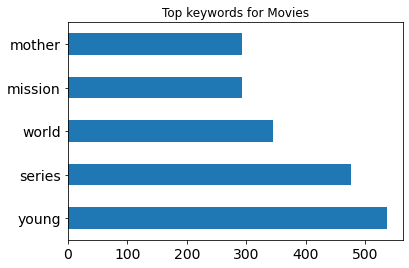

In [45]:
#Top Keywords per type (Movies and TV Shows)
#This will show the top keywords from their description and will tell what are the common themes for movies, shows, and all of types in Netflix. 

KWMovies.plot(kind="barh", fontsize=14, title="Top keywords for Movies")

c:\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Top Keywords for TV Shows'}>

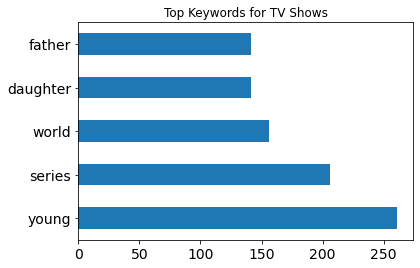

In [46]:
KWShows.plot(kind="barh", fontsize=14, title="Top Keywords for TV Shows")

c:\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Top Keywords in Netflix'}>

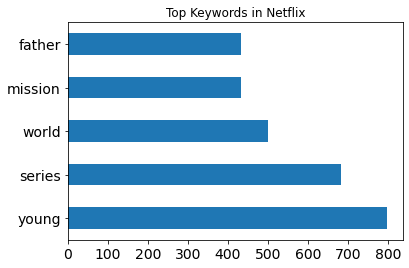

In [47]:
KW.plot(kind="barh", fontsize=14, title="Top Keywords in Netflix")


In [48]:
#If people were to guess the same description, would they have the same answers?- As seen here in this data set, every topic in each description ended up with different results.
unseen_df.head()

c:\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Description,Tokens,topic_1,topic_1_prob,topic_2,topic_2_prob,topic_3,topic_3_prob
0,Comic Sam Kinison lets it rip with this perfor...,"[comic, sam, it, rip, with, this, performance,...",2,0.15,16,0.289287,26,0.146431
1,"While suitors swoon over her cousin, a single ...","[while, swoon, over, her, cousin, a, single, w...",8,0.18,14,0.215085,32,0.190691
2,While investigating a series of murders and th...,"[while, investigating, a, series, of, and, the...",11,0.15,20,0.14643,21,0.574901
3,"Eight stories celebrating family, faith, love ...","[eight, family, faith, love, and, forgiveness,...",14,0.21,20,0.104366,32,0.220633
4,"Lazy, lasagna-loving fat cat Garfield lives li...","[lazy, fat, cat, life, on, his, own, which, te...",2,0.26,4,0.256231,34,0.256285


# Final Learnings: 

Doing this project was a challenge for us especially when looking for the most suitable model to use based on what we want to know about the dataset. Luckily, we found a dataset that already consists of useful information and requires little data cleaning. 

We had the most difficulty in using the LDA model and visualizing it because it was not part of the discussion in class, but it was made possible and we extracted meaningful results that answers our questions. 

Based on the result we saw how there are common topics for most genres and types like the topics 19 and 18 (where tha words can be seen in the pyLDavis Chart). Also, based on the unseen data extracted from the model it can be seen how other words related to the words in their description gives a different definition for the movie/show.







#References: 

**Data set:**

*Retrieved from:* Kaggle.com

*Title:* Netflix Movies and TV Shows (Movies and TV Shows listings on Netflix)

*link:* https://www.kaggle.com/shivamb/netflix-shows/notebooks



**LDA Topic Modelling sources:**
- https://towardsdatascience.com/lda-topic-modeling-an-explanation-e184c90aadcd
- https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2


**Other Sources**
- .Larose and D. Larose, (2019)  Data Science Using Python and R 
- https://stats.stackexchange.com/questions/185983/calculating-precision-and-recall-for-lda